## Experiment: Performance Comparison of DataFrame Row Iteration Methods

There are several ways to iterate over the rows of a Pandas DataFrame. The most common methods are `itertuples()`, `iterrows()`, and `apply()`. Each method has its own performance characteristics, and understanding these can help you choose the most efficient approach for your data processing tasks.

To compare the performance of these methods, we will measure the time taken to iterate over DataFrames of varying sizes using each method. Please run the code below to see the performance comparison. What do you observe? Try checking what each function does under the hood (type conversions, etc.).
Note that the axes are **logarithmic**. If the code takes too long to run (you should expect ~4min), please reduce the `MAX_ITERS` variable. 

In [ ]:
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt

In [5]:
def df_itertuples(df):
    for t in df.itertuples():
        _ = t.one  # simple element access


def df_iterrows(df):
    for i, row in df.iterrows():
        _ = row.one  # simple element access


def df_apply(df):
    df.apply(
        lambda x: x.one, axis=1  # simple element access
    )

In [6]:
def timeit(func):
    import time
    start = time.time()
    func(df)
    end = time.time()
    return end - start

Testing N=100
Testing N=1000
Testing N=10000
Testing N=100000
Testing N=1000000
Testing N=10000000


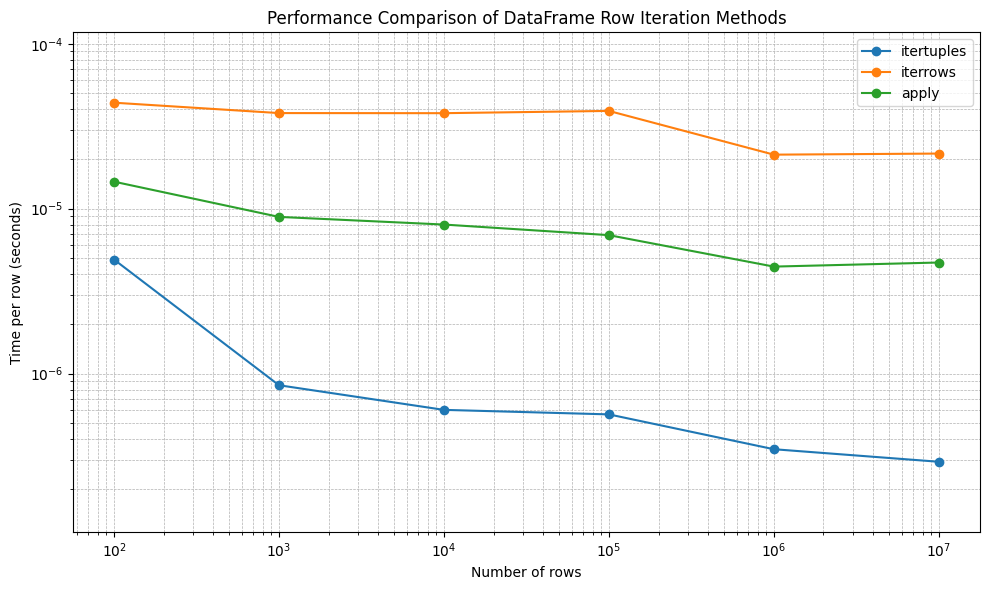

In [7]:
import matplotlib.pyplot as plt

x = []
y_it = []
y_ir = []
y_a = []

MAX_ITERS = 8
for j in range(2, MAX_ITERS):
    N = int(10**j)
    print(f"Testing N={N}")
    df = pd.Series(np.random.random(size=N), name="one").to_frame()
    x.append(N)
    y_it.append(timeit(df_itertuples))
    y_ir.append(timeit(df_iterrows))
    y_a.append(timeit(df_apply))

plt.figure(figsize=(10, 6))
plt.plot(x, np.array(y_it) / np.array(x), label='itertuples', marker='o')
plt.plot(x, np.array(y_ir) / np.array(x), label='iterrows', marker='o')
plt.plot(x, np.array(y_a) / np.array(x), label='apply', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of rows')
plt.ylabel('Time per row (seconds)')
plt.title('Performance Comparison of DataFrame Row Iteration Methods')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.tight_layout()
plt.legend()